In [1]:
import random

from typing import List, Tuple

# Лабораторная работа 1. Методы сортировки

Вариант: 8

## Сортировка чёт-нечет

Другие названия:

- Кирпичная сортировка

- Сортировка Бэтчера

### Классификация алгоритма:

- По типу алгоритма: на основе сравнения; обменная сортировка

- По устойчивости: устойчивый

- По месту хранения данных: на месте

- По выделению дополнительного пространства: сортировка на месте

- По дополнительным затратам памяти: $O(1)$
   
- Время выполнения: 
  
  - В худшем случае: $O(n^2)$
  
  - В лучшем случае: $O(n)$
  
  - В среднем: $O(n^2)$

### Описание алгоритма:

Алгоритм представляет вариацию алгоритма пузырьковой сортировки. Интересен он тем, что допускает естественное распараллеливание. Как и в алгоритме пузырька внешний цикл задает n проходов по сортируемому массиву. На каждом проходе, как и в алгоритме пузырька, происходит сравнение и обмен двух соседних элементов. Но есть два важных отличия:

- на каждом проходе производится n/2 независимых сравнений соседних пар, так что никакой элемент пары не участвует в дальнейших сравнениях на данном проходе;

- Проходы делятся на четные и нечетные. На четных проходах обмен начинается с пары ($a_{n-1}$, $a_{n-2}$,). На нечетном проходе производится сдвиг и начальной парой является пара ($a_{n-2}$, $a_{n-3}$,). (Предполагается, что нумерация элементов массива начинается с нуля).

В отличие от "пузырька", где на i-м проходе первые i элементов занимают свои места, в алгоритме "чет - нечет" элементы гарантировано занимают свои места после выполнения всех n проходов. Для самого легкого элемента достаточно n - 1 проход для "всплытия" в вершину массива, так как на каждом проходе элемент поднимается вверх на одну позицию. Для следующего за ним элемента может понадобиться в самом неблагоприятном случае ровно N проходов. На первом проходе элемент может опуститься на последнее место (например в случае инверсного массива), на втором проходе остаться на последнем месте, поскольку не будет участвовать в сравнениях, а затем начнет подниматься и за n - 2 прохода станет на свое место. Не буду проводить формального доказательства корректности алгоритма для всех элементов, приведу реализацию алгоритма:

### Блок-схема алгоритма

![Блок-Схема](./img/bd.png)

### Псевдо-код алгоритма (Код на С++)

In [2]:
template <typename T>    
void oddEvenSort(T arr[]) {

    int n = sizeof(arr) / sizeof(arr[0]);

    bool isSorted = false;

    while (!isSorted) {
    
        isSorted = true;

        // Нечетная сортировка
        for (int i = 1; i < n - 1; i += 2) {
            if (arr[i] > arr[i+1]) {
                std::swap(arr[i], arr[i+1]);
                isSorted = false;
            }
        }

        // Четная сортировка
        for (int i = 0; i < n - 1; i += 2) {
            if (arr[i] > arr[i+1]) {
                std::swap(arr[i], arr[i+1]);
                isSorted = false;
            }
        }
    }
}

SyntaxError: invalid syntax (2816217410.py, line 1)

### Реализация алгоритма

Достоинства алгоритма:

- Простота реализации

- Эффективность на небольших массивах

- Параллелизация

Недостатки алгоритма:

- Низкая производительность

- Неустойчивость

In [3]:
### Реализация алгоритма

def odd_even_sort(X: List)->List:
    """Сортировка чёт-нечет"""

    n = len(X)

    is_sorted = False

    while not is_sorted:

        is_sorted = True

        for i in range(1, n - 1, 2):
            if X[i] > X[i + 1]:
                X[i], X[i + 1] = X[i + 1], X[i]
                is_sorted = False

        for i in range(0, n - 1, 2):
            if X[i] > X[i + 1]:
                X[i], X[i + 1] = X[i + 1], X[i]
                is_sorted = False

    return X

Ручная трассировка:

| Step | Elements |
| --- | --- |
| 0 |4 3 2 1 |
| 1(нечет) | 4 2 1 3 |
| 2(чет) | 2 1 3 4 |
| 3(нечет) | 2 1 3 4 |
| 4(чет) | 1 2 3 4 |
| 5(нечет) | 1 2 3 4 |
| 6(чет) | 1 2 3 4 |

In [4]:
### Тестирование программы

sortmethod = odd_even_sort

assert sortmethod([1, 2, 3, 4]) == [1, 2, 3, 4], 'Ошибка при сортировки отсортированного массива'

assert sortmethod([4, 3, 2, 1]) == [1, 2, 3, 4], 'Ошибка при сортировки отсортированного в обратном порядке массива'

assert sortmethod([1, 3, 4, 2]) == [1, 2, 3, 4], 'Ошибка при сортировки произвольного массива'

assert sortmethod([1, 3, 1, 2]) == [1, 1, 2, 3], 'Ошибка при сортировки массива с повторящимися элементами'

In [5]:
# Набор данных для тестирования алгоритма

def get_sort_array(n:int)->Tuple:
    '''Возвращает отсортированный массив'''
    return tuple(range(n))

def get_reverse_array(n:int)->Tuple:
    '''Возвращает отсортированный в обратном порядке массив'''
    return tuple(range(n))[::-1]

def get_random_array(n:int)->Tuple:
    '''Возвращает перемешанный массив'''
    return tuple(random.sample(range(n), n))


In [6]:
from datetime import datetime

# Производим сортировку массивов различный длины

length = [0, 500, 1000, 5000, 10000]
cpu_times = {
    'sort_array' : [],
    'reverse_array' : [],
    'random_array' : []
}

for array_len in length:
    # Для сортированного массива
    start_time = datetime.now()
    sortmethod(list(get_sort_array(array_len)))
    cpu_times['sort_array'].append(str(datetime.now() - start_time))

    # Для перевернутого массива
    start_time = datetime.now()
    sortmethod(list(get_reverse_array(array_len)))
    cpu_times['reverse_array'].append(str(datetime.now() - start_time))

    # Для рандомного массива
    start_time = datetime.now()
    sortmethod(list(get_random_array(array_len)))
    cpu_times['random_array'].append(str(datetime.now() - start_time))

In [7]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


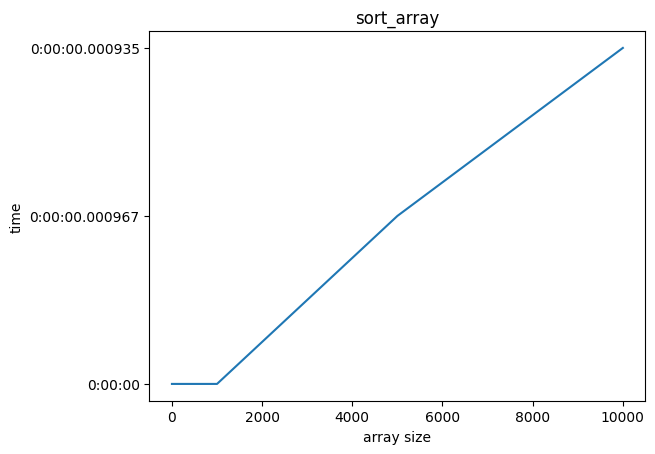

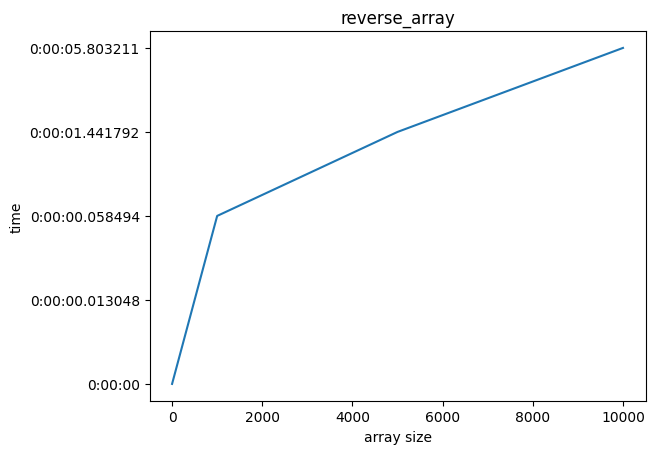

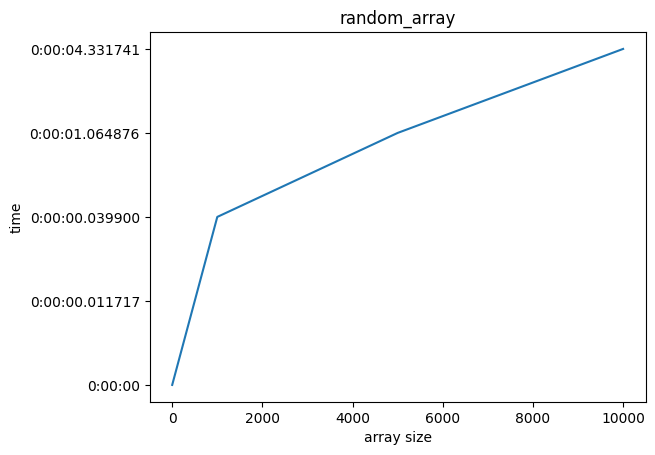

In [8]:
from matplotlib import pyplot

for key in cpu_times:
    pyplot.plot(length, cpu_times[key])
    pyplot.title(key)
    pyplot.xlabel('array size')
    pyplot.ylabel('time')
    pyplot.show()
pyplot.show()

### Литература

https://intuit.ru/studies/courses/10554/1092/lecture/27091

https://ru.wikipedia.org/wiki/%D0%A1%D0%BE%D1%80%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0_%D1%87%D1%91%D1%82-%D0%BD%D0%B5%D1%87%D0%B5%D1%82